In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

seizure_df = pd.read_csv("Epileptic Seizure Recognition.csv")
seizure_df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [269]:
seizure_df.shape

(11500, 180)

In [270]:
seizure_df.dropna().shape

(11500, 180)

In [271]:
original_labels = seizure_df[['y']].copy()

In [272]:
seizure_df['y']=seizure_df['y'].replace(to_replace=5,value= 0)
seizure_df['y']=seizure_df['y'].replace(to_replace=3,value= 0)
seizure_df['y']=seizure_df['y'].replace(to_replace=4,value= 0)
seizure_df['y']=seizure_df['y'].replace(to_replace=2,value= 0)

In [273]:
classification = seizure_df[["Unnamed","y"]].copy()
df = seizure_df.copy()


In [274]:
seizure_df.drop(["Unnamed","y"],axis = 1,inplace = True)
seizure_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [275]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(seizure_df)
scaled_df = pd.DataFrame(scaled)
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.885051,1.209929,1.462764,1.439539,1.242366,0.818262,0.380910,-0.014267,-0.163196,-0.198415,...,0.105907,-0.041630,-0.020282,-0.107131,-0.375743,-0.535944,-0.693858,-0.634144,-0.433290,-0.235399
1,2.400577,2.366190,2.239441,2.109257,2.037441,1.996033,1.941660,1.719102,1.546403,1.484569,...,1.074264,1.057700,0.972841,0.943023,0.982911,1.018615,1.029295,1.023429,0.954241,0.856537
2,-0.123287,-0.169154,-0.225131,-0.172743,-0.149016,-0.179743,-0.312756,-0.409056,-0.484131,-0.547478,...,0.233004,0.407820,0.455214,0.361582,0.193824,0.008151,-0.103237,-0.136872,-0.138593,-0.144405
3,-0.564057,-0.542530,-0.524794,-0.513803,-0.503073,-0.545472,-0.591462,-0.575607,-0.496475,-0.453979,...,-0.426689,-0.436417,-0.417531,-0.397851,-0.375743,-0.428321,-0.389414,-0.364021,-0.347337,-0.320328
4,0.015586,-0.325731,-0.537025,-0.575814,-0.434746,-0.254129,-0.058825,0.041250,-0.089134,-0.329314,...,0.118012,0.085916,0.082040,0.005598,-0.108758,-0.165242,-0.316347,-0.431551,-0.470127,-0.368858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-0.062907,-0.066777,-0.078358,-0.104531,-0.173862,-0.216936,-0.238435,-0.217830,-0.237258,-0.266981,...,0.178534,0.152726,0.166305,0.147991,0.110762,0.073921,-0.030170,-0.149150,-0.212268,-0.217200
11496,-0.213856,-0.000533,0.233536,0.534181,0.925578,1.351359,1.563860,1.521707,1.231639,0.886175,...,-0.511420,-0.333165,-0.128622,0.035263,0.164159,0.241335,0.371696,0.550714,0.794613,1.105255
11497,0.154459,0.101845,-0.017202,-0.042521,0.111868,0.204582,0.207494,-0.014267,0.065162,0.125715,...,-0.196704,-0.333165,-0.218906,-0.285123,-0.286748,-0.320698,-0.103237,0.065721,0.070150,0.025452
11498,-0.171590,-0.084843,0.007260,-0.017716,0.037330,0.117799,0.083625,0.158453,0.176255,0.219214,...,0.747443,0.796533,0.882557,0.954889,0.929514,0.773473,0.603073,0.495462,0.438521,0.407630


In [276]:
from sklearn.decomposition import KernelPCA
kpca_two = KernelPCA(n_components = 2,kernel ='rbf',eigen_solver='dense')
reduced_two = kpca_two.fit_transform(scaled_df)
reduced_two_df = pd.DataFrame(reduced_two)
reduced_two_df.columns = ['P1', 'P2']

In [277]:
from sklearn.decomposition import KernelPCA
kpca_five= KernelPCA(n_components = 5,kernel ='rbf',eigen_solver='dense')
reduced_five = kpca_five.fit_transform(scaled_df)
reduced_five_df = pd.DataFrame(reduced_five)
reduced_five_df.columns = ['P1', 'P2','P3','P4','P5']

# I started  with K-means clustering first to see how it performed. with it being the most common. I will be manually choosing the number of clusters. While clustering is an unsupervised method, I wanted to see how it performed when I know the labels, but it doesn't. In this case I will play around with 2 clusters or 5 clusters. 2 due to me wanting to see if there was a pattern caught between non-epilepsy and epilepsy. 5 comes from the original number of labels.

In [278]:
#While in different cases it may not be best to chose manually the number of clusters,
#There wasn't enough data in general to actually see anything aside from seizure versus non-seizure
#Thus, I decided to go manually with two clusters. At the end of this notebook, you can see where I tried KPCA due to the 
#non-linear nature of the data to try and find the n_clusters and got 39 or 40 based on how I scaled the data. 
#PCA was tried first but still had the same kind of results. As I said, I don't have enough insight to the data, paitents
# or EEG reading in general to try and find out if there is any pattern that may be seen with the 40 clusters such as type or severity
# or how it may also be linked to the original label of the paitent.
#TLDR, While boring, manual picking of n_clusters made more sense, but my trials can be found at the end of this notebook. 

In [279]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1).fit(reduced_two_df)

y_pred_2 = kmeans.predict(reduced_two_df)
y_pred_2.shape

(11500,)

In [280]:
two_df = pd.DataFrame(y_pred_2, columns=[''])
new_two_df = pd.concat([df, two_df], axis=1)
new_two_df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,0,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,0,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,0,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,16,12,5,-1,-18,-37,-47,-48,0,0
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-33,-7,14,27,48,77,117,170,1,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-48,-61,-62,-67,-30,-2,-1,-8,0,0
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,135,148,143,116,86,68,59,55,0,0


In [281]:
new_two_df['y'].value_counts()

0    9200
1    2300
Name: y, dtype: int64

In [282]:
new_two_df[''].value_counts()

0    9376
1    2124
Name: , dtype: int64

In [296]:
from sklearn import metrics
mae = metrics.mean_absolute_error(new_two_df['y'].to_numpy(),new_two_df[''].to_numpy())
mse = metrics.mean_squared_error(new_two_df['y'].to_numpy(), new_two_df[''].to_numpy())
rmse = metrics.mean_squared_error(new_two_df['y'].to_numpy(), new_two_df[''].to_numpy(),squared = False)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Mean Absolute Error: 0.044869565217391306
Mean Square Error: 0.044869565217391306
Root Mean Square Error: 0.21182437352059208


# Just from what I can see in the new column compared to the original, the value one matches with one and 2 with zero. Lets try it for seeing differenced between the original 5 labels

In [283]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=1).fit(reduced_five_df)

y_pred_5 = kmeans.predict(reduced_five_df)
y_pred_5.shape

(11500,)

In [284]:
five_df = pd.DataFrame(y_pred_5, columns=[''])
new_five_df = pd.concat([seizure_df,original_labels, five_df], axis=1)
new_five_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X171,X172,X173,X174,X175,X176,X177,X178,y,
0,135,190,229,223,192,125,55,-9,-33,-38,...,-15,-31,-77,-103,-127,-116,-83,-51,4,0
1,386,382,356,331,320,315,307,272,244,232,...,150,146,152,157,156,154,143,129,1,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,64,48,19,-12,-30,-35,-35,-36,5,4
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-81,-80,-77,-85,-77,-72,-69,-65,5,4
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,2,-12,-32,-41,-65,-83,-89,-73,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,16,12,5,-1,-18,-37,-47,-48,2,2
11496,-47,-11,28,77,141,211,246,240,193,136,...,-33,-7,14,27,48,77,117,170,1,0
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-48,-61,-62,-67,-30,-2,-1,-8,5,3
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,135,148,143,116,86,68,59,55,3,4


# I also what to try a fuzzy clustering method. Based on already known knowledge, while a paitent's EEG read as seizure(1) or no seizure(2-5), it is not known if a case 2-5 was also present. During epileptic seizure, paitents commonly have their eyes open, or the node may have been place near the ealthy part of the brain, but that gets overridden by the label 1 if the paitent has a seizure. Thus, by real life analysis, a paitent may get place in two groups or clusters. Fuzzy clustering also allows for an alogorithm to place someone in two or more groups. I wanted to see if this would make a difference.This was my reference: 
https://towardsdatascience.com/fuzzy-c-means-clustering-is-it-better-than-k-means-clustering-448a0aba1ee7

In [285]:
from fcmeans import FCM

In [286]:
fcm = FCM(n_clusters=5)
fcm.fit(reduced_five_df.to_numpy())

In [287]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(reduced_five_df.to_numpy())

In [288]:
temp_df = pd.DataFrame(fcm_labels, columns=[''])
new_temp_df = pd.concat([seizure_df,original_labels, temp_df], axis=1)
new_temp_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X171,X172,X173,X174,X175,X176,X177,X178,y,
0,135,190,229,223,192,125,55,-9,-33,-38,...,-15,-31,-77,-103,-127,-116,-83,-51,4,2
1,386,382,356,331,320,315,307,272,244,232,...,150,146,152,157,156,154,143,129,1,4
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,64,48,19,-12,-30,-35,-35,-36,5,3
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-81,-80,-77,-85,-77,-72,-69,-65,5,3
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,2,-12,-32,-41,-65,-83,-89,-73,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,16,12,5,-1,-18,-37,-47,-48,2,1
11496,-47,-11,28,77,141,211,246,240,193,136,...,-33,-7,14,27,48,77,117,170,1,4
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-48,-61,-62,-67,-30,-2,-1,-8,5,1
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,135,148,143,116,86,68,59,55,3,3


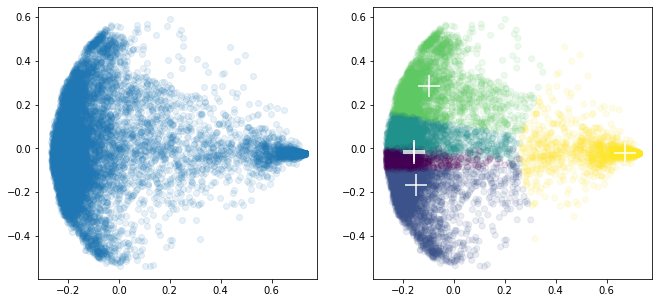

In [289]:
temp = reduced_five_df.to_numpy()
fig, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(temp[:,0], temp[:,1], alpha=.1)
axes[1].scatter(temp[:,0], temp[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()